<a href="https://colab.research.google.com/github/mvidales775/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##First choice: Cirrhosis Prediction Dataset

1. Source of data
  - https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

2. Brief descrip
  - contains dataset of 418 cases that met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine over a ten year period.

3. What is the target?
  - Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row repreesents a person

5. Is this a classification or regression problem?
  - Classification, trying to determine if a person recived either D-penicillamine or placebo

6. How many features does the data have?
  - There are 18 features

7. How many rows are in the dataset?
  - There are 418 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This dataset has a few features with missing values including the the target which could lead to a low outcome for the model.

##Second choice: Adult income dataset

1. Source of data
  - https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

2. Brief description of data


3. What is the target?
  - two income groups: <=50K and >50K

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row is a person

5. Is this a classification or regression problem?
  - since there are two income groups it is a classification problem

6. How many features does the data have?
  - there are 13 features

7. How many rows are in the dataset?
  - there are 48842 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This dataset has alot of data with no null values, i do not see any problems at the moment.

# Cirrhosis Data Part 2

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import missingno as msno

In [2]:
fpath = "/content/drive/MyDrive/CodingDojo/Project 2/cirrhosis.csv"

df = pd.read_csv(fpath, index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df['Status'] = df['Status'].replace({'D':0, 'C':1, 'CL':2})

In [4]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [5]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

No duplicate rows were found

In [7]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0]

Drug             25.358852
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Cholesterol      32.057416
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

There is about a qurater missing from multilple features including the target.

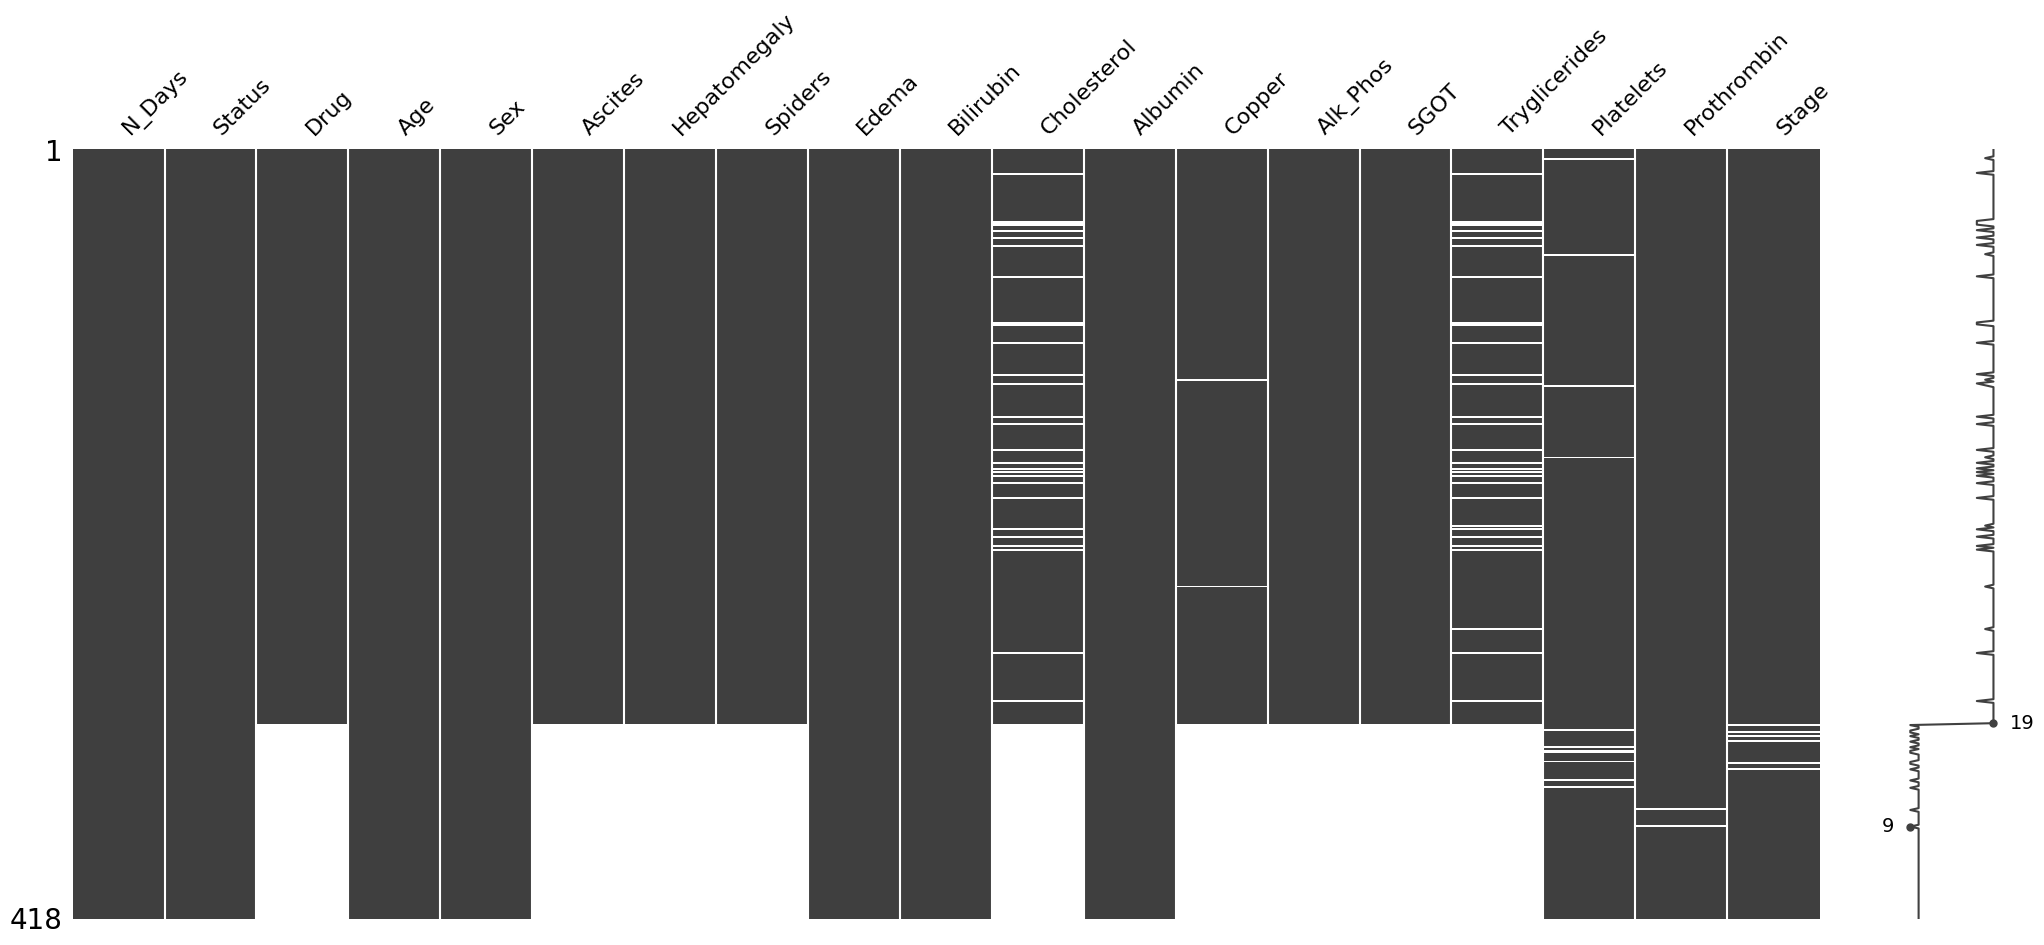

In [8]:
msno.matrix(df);

Using the msno visual we see that the majority of missing data is grouped together so dropping the rows with missing 'drug' data will be helpful

In [9]:
df = df.dropna(subset=["Drug"])

In [10]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0]

Cholesterol      8.974359
Copper           0.641026
Tryglicerides    9.615385
Platelets        1.282051
dtype: float64

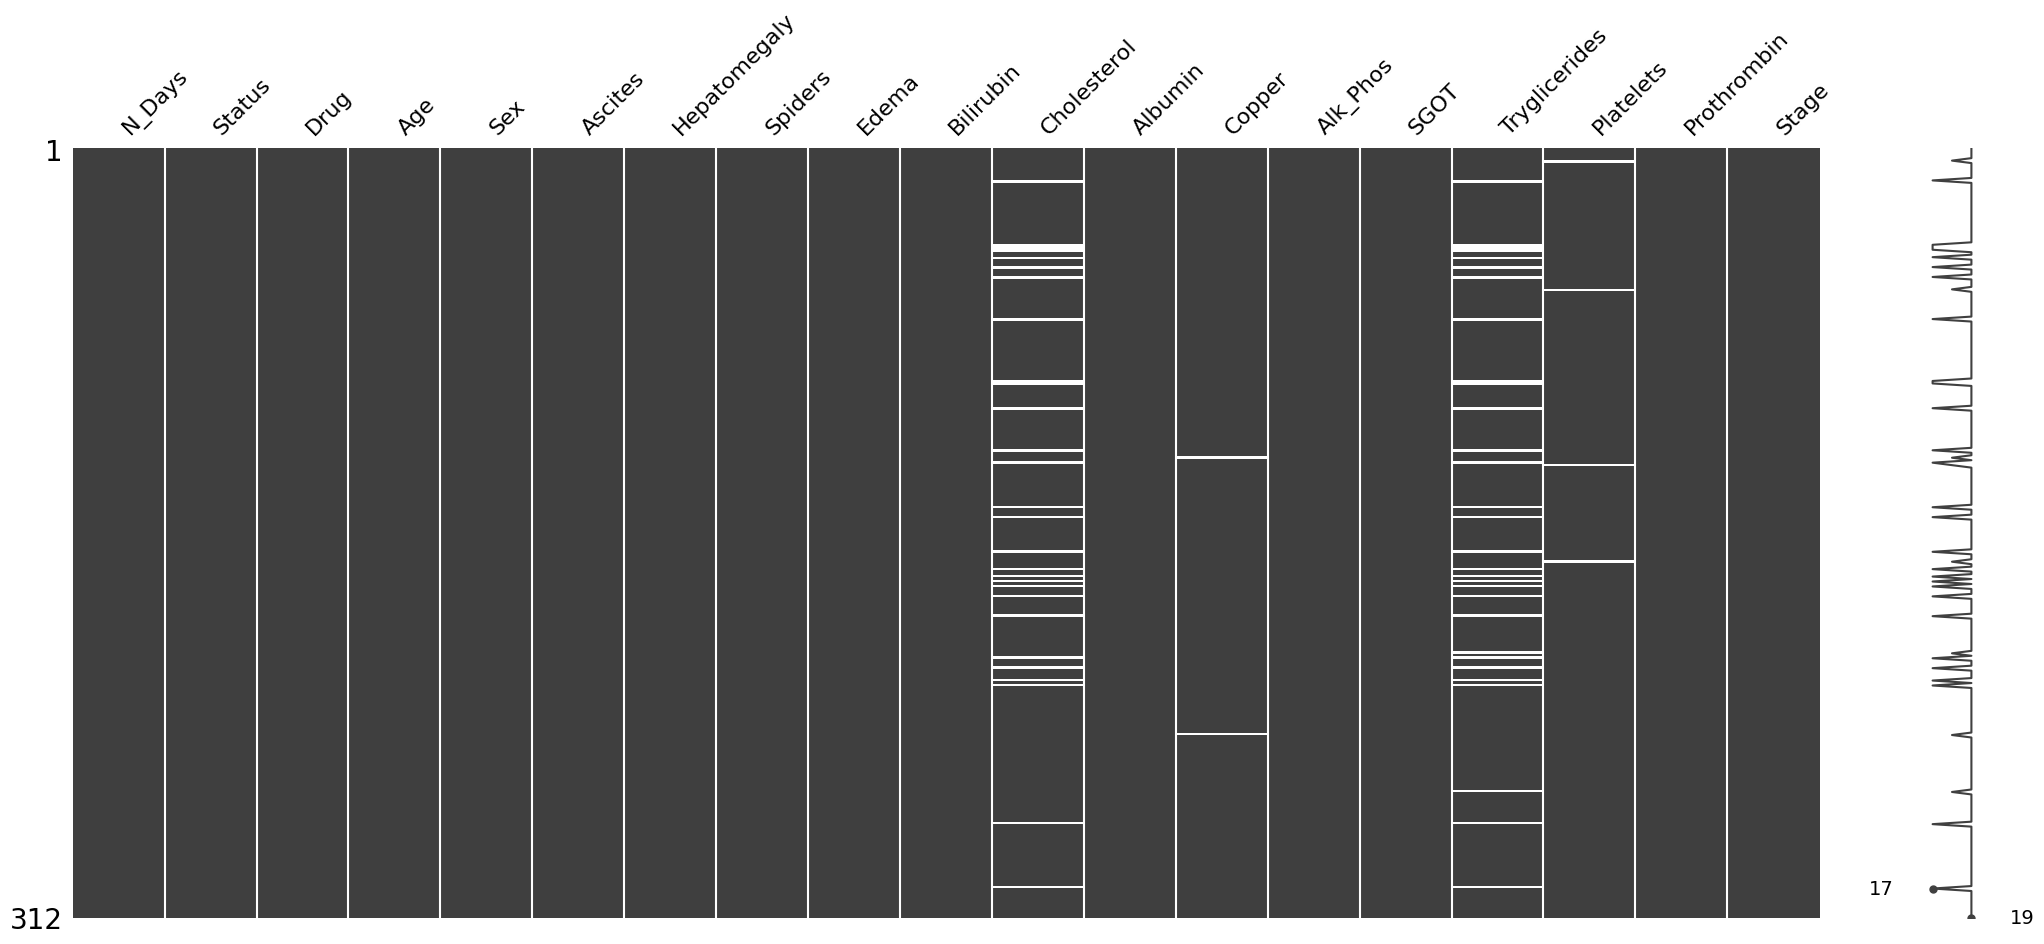

In [11]:
msno.matrix(df);

In [12]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Drug
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64


Value Counts for Sex
F    276
M     36
Name: Sex, dtype: int64


Value Counts for Ascites
N    288
Y     24
Name: Ascites, dtype: int64


Value Counts for Hepatomegaly
Y    160
N    152
Name: Hepatomegaly, dtype: int64


Value Counts for Spiders
N    222
Y     90
Name: Spiders, dtype: int64


Value Counts for Edema
N    263
S     29
Y     20
Name: Edema, dtype: int64




All the data for the catagorical features are consistant

##Graphs

Num

In [13]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

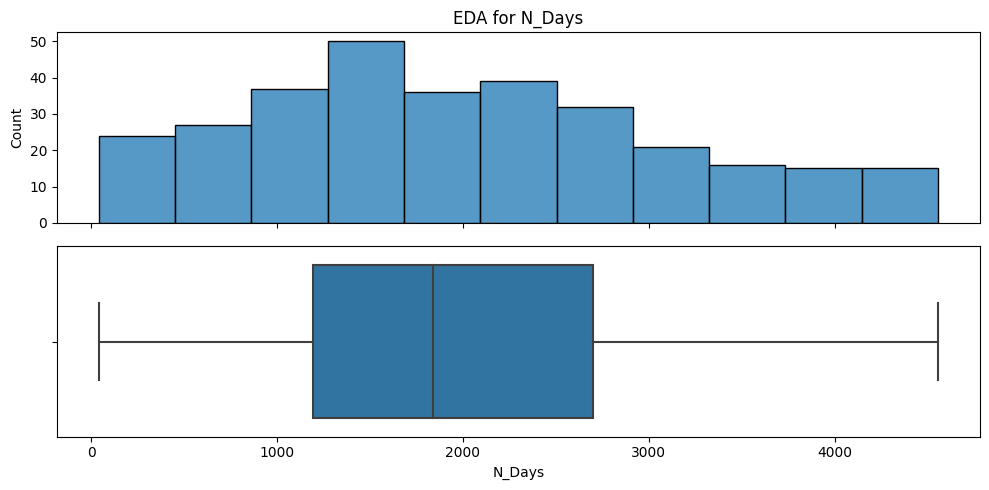

In [14]:
plot_numeric(df,'N_Days')

The graph shows the mean average on N_days (number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986) which is between 1000 days and just above 2500 days.

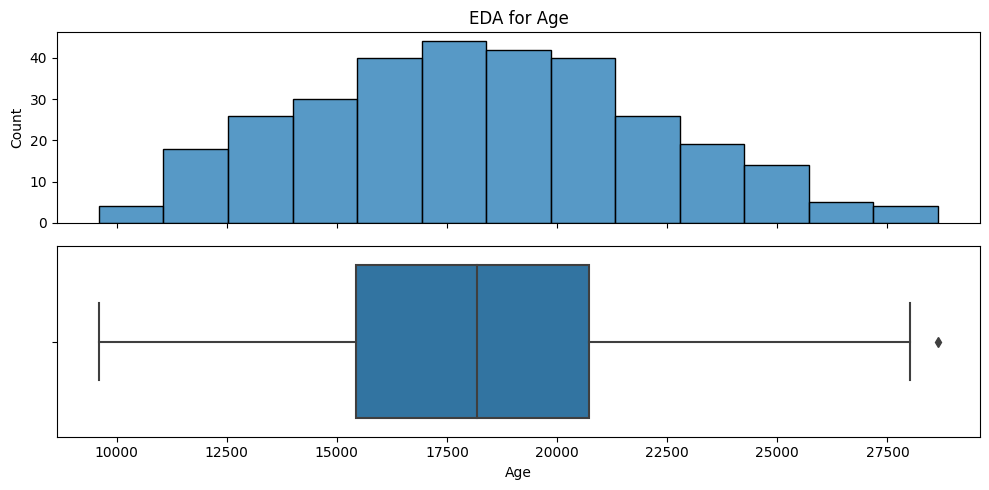

In [15]:
plot_numeric(df,'Age')

The graph shows the mean average the patients age in days which is between 15,000 and just above 20,000 or between 41 and 55 years old

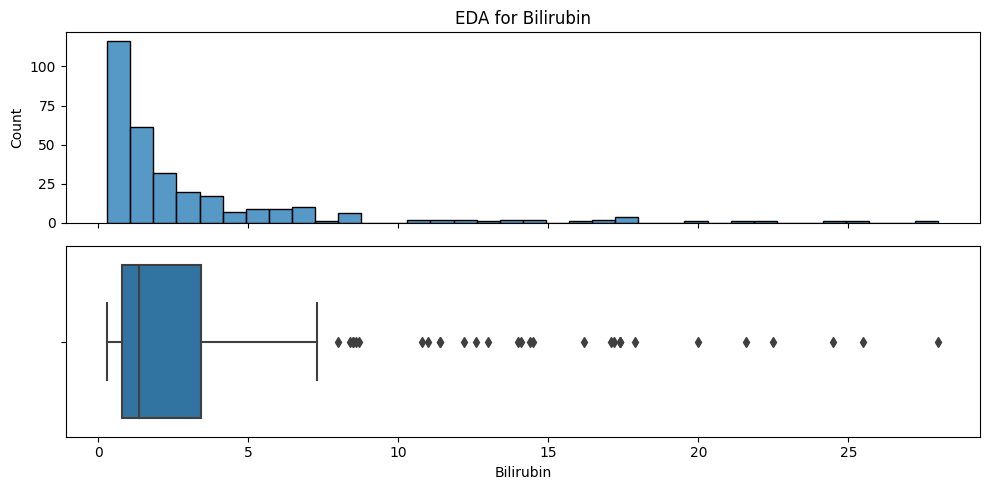

In [16]:
plot_numeric(df,'Bilirubin')

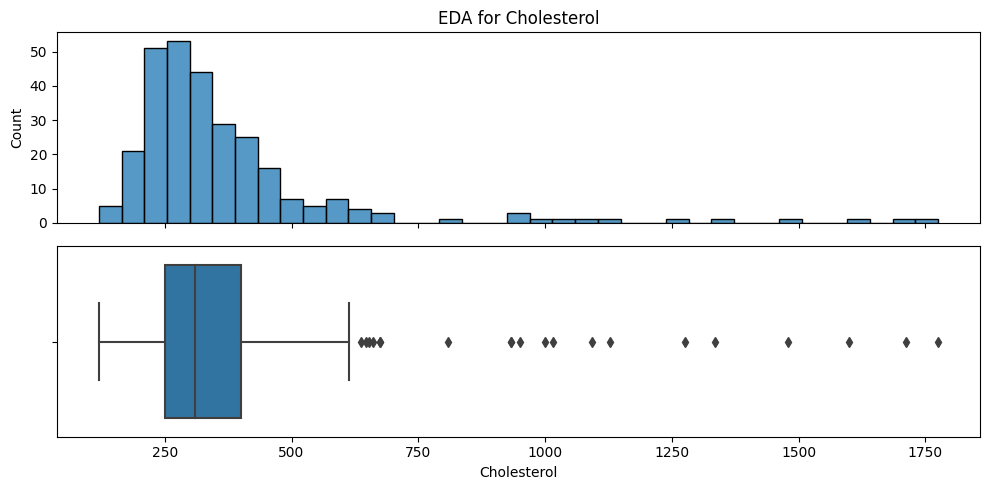

In [17]:
plot_numeric(df,'Cholesterol')

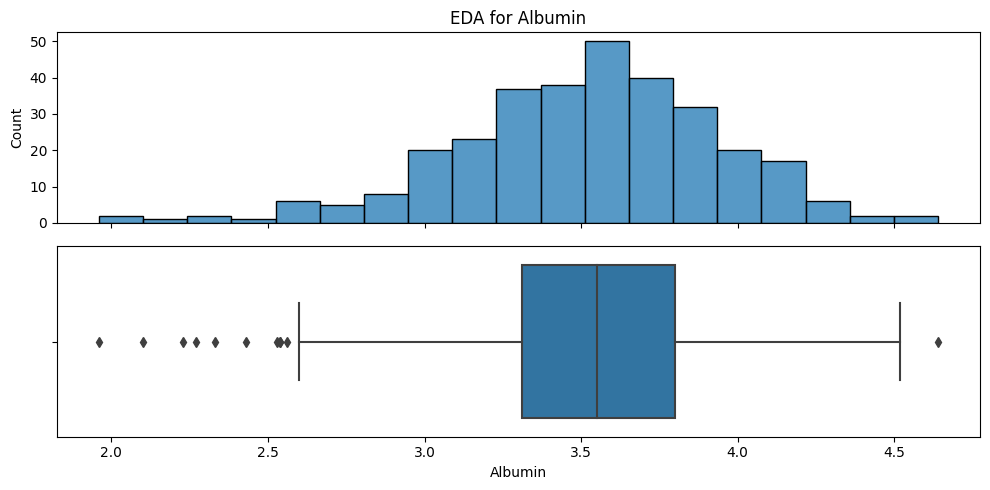

In [18]:
plot_numeric(df,'Albumin')

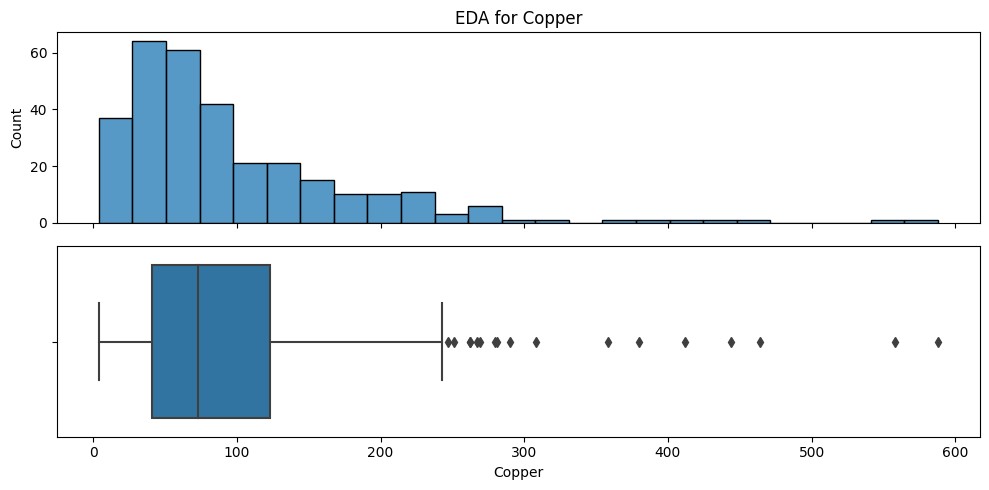

In [19]:
plot_numeric(df,'Copper')

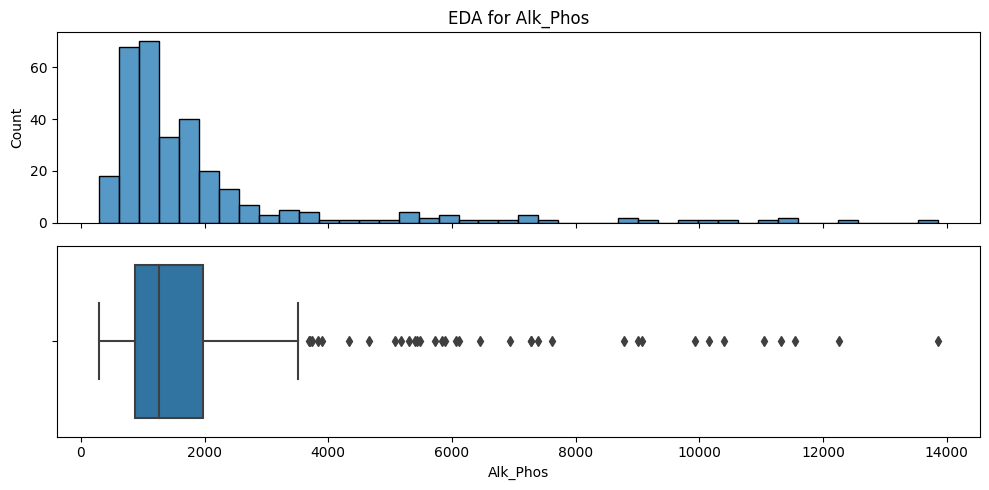

In [20]:
plot_numeric(df,'Alk_Phos')

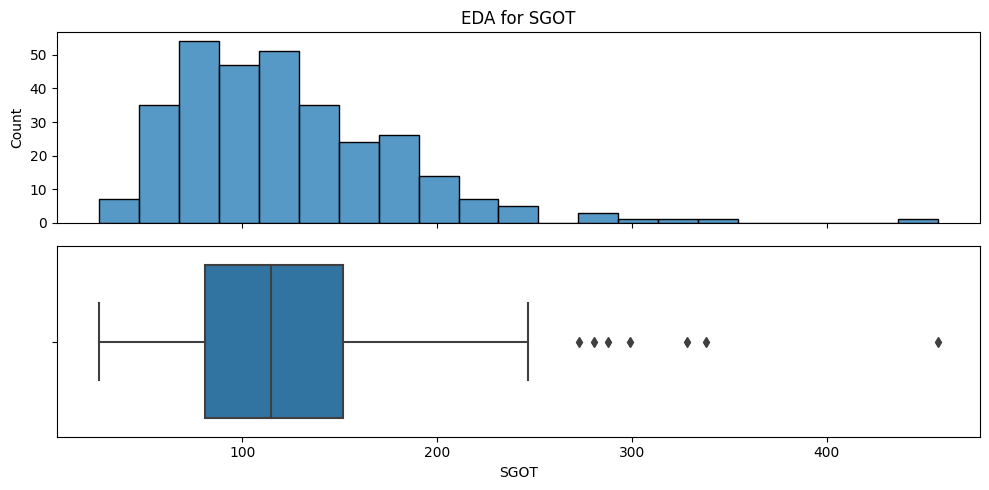

In [21]:
plot_numeric(df,'SGOT')

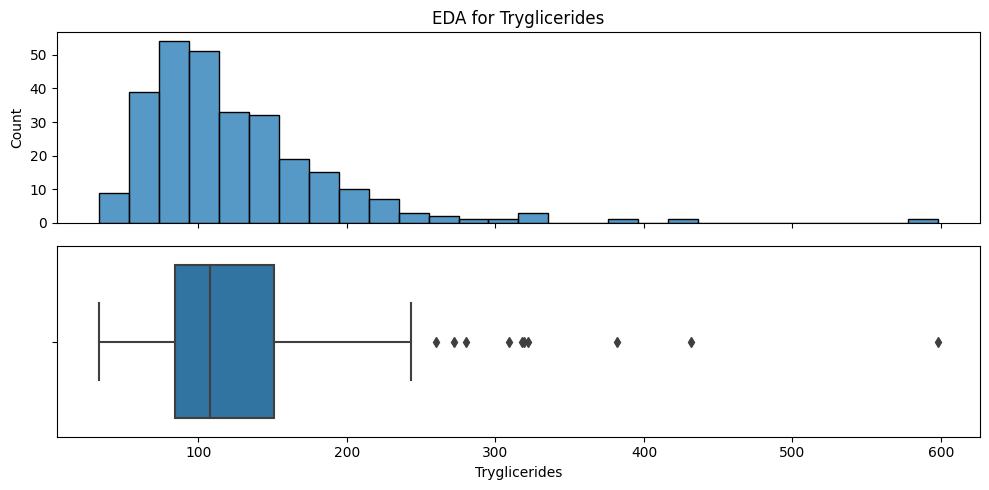

In [22]:
plot_numeric(df,'Tryglicerides')

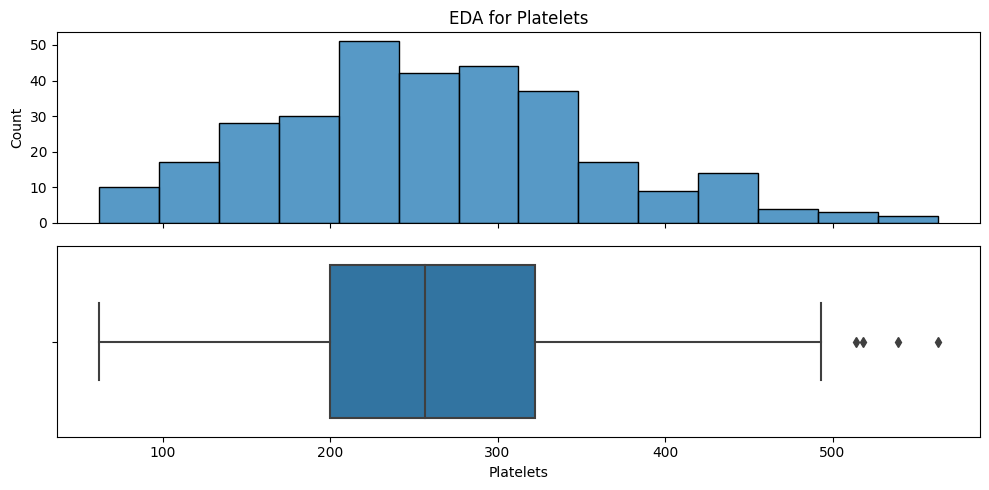

In [23]:
plot_numeric(df,'Platelets')

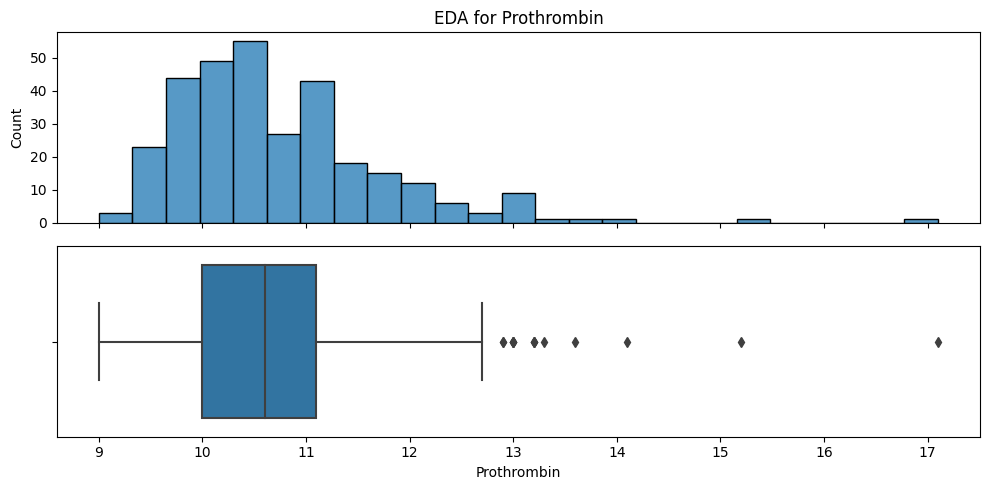

In [24]:
plot_numeric(df,'Prothrombin')

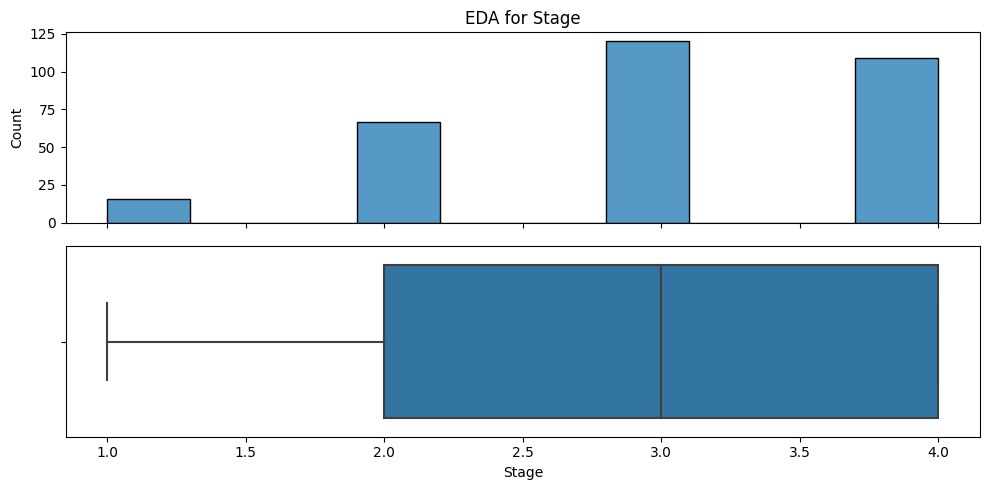

In [25]:
plot_numeric(df,'Stage')

The graph shows mean average of which stage of cirrhosis a patient was recorded at during the trial, the majority are late stage.

Cat

<Axes: xlabel='Drug', ylabel='count'>

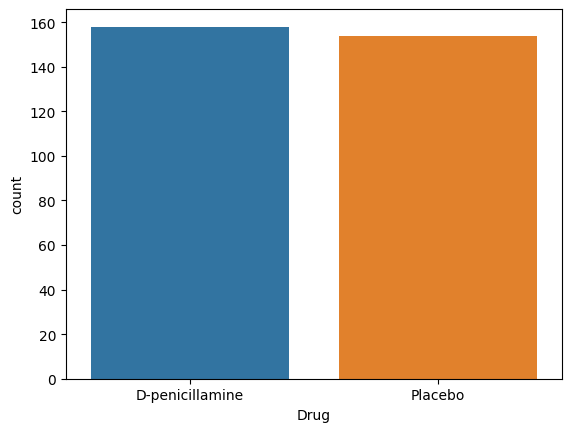

In [26]:
sns.countplot(data=df, x="Drug")

This graph shows that the data is balanced with the amount of patients given a Placebo vs. D-penicillamine

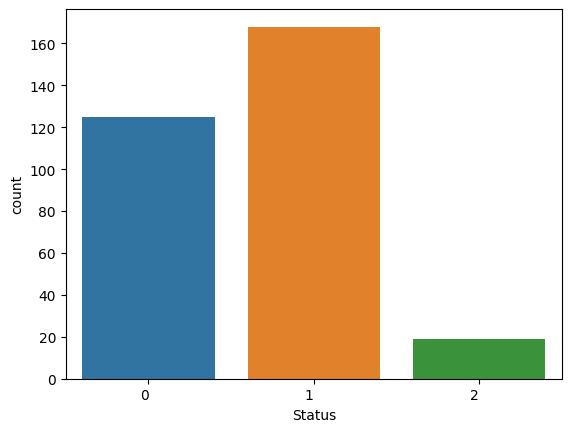

In [27]:
ax = sns.countplot(data=df, x="Status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

This graph shows the count of deceased or censored patients in the data

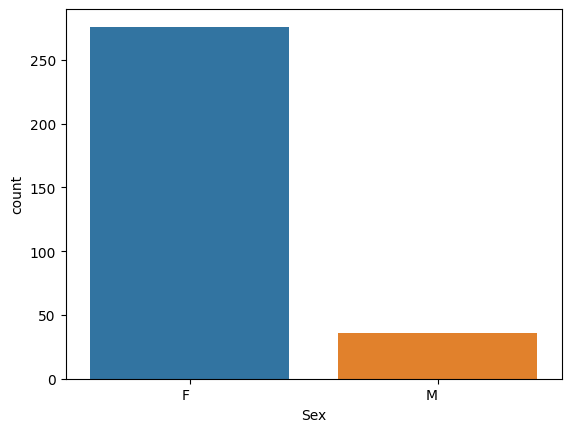

In [28]:
ax = sns.countplot(data=df, x="Sex")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

This graph show a majority of participants are female

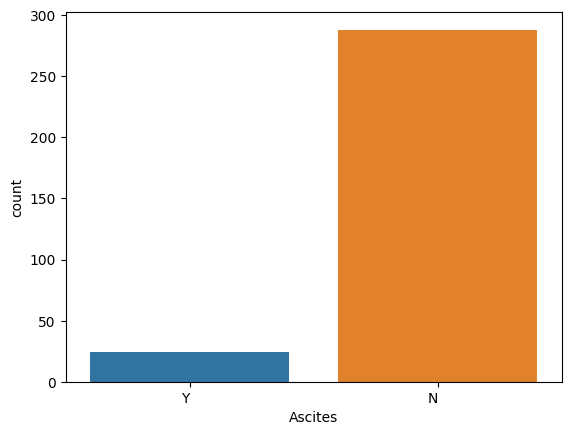

In [29]:
ax = sns.countplot(data=df, x="Ascites")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

This graph show a majority of particepants do not have ascites (buildup of fluid in your belly, often due to severe liver disease)

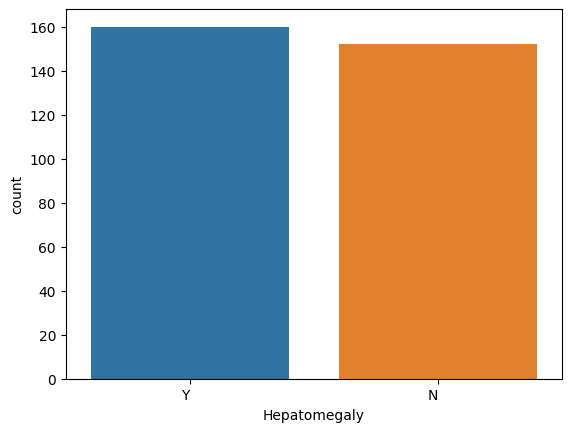

In [30]:
ax = sns.countplot(data=df, x="Hepatomegaly")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

This graph shows the data has about an equal amount of participants the have heptomegaly

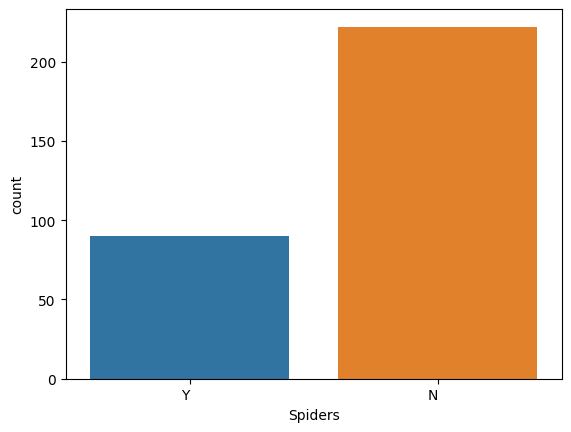

In [31]:
ax = sns.countplot(data=df, x="Spiders")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

This graph show a majority of particpants do not sho spiders

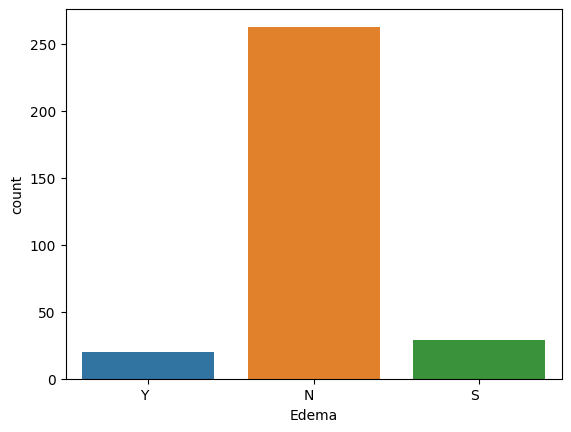

In [32]:
ax = sns.countplot(data=df, x="Edema")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right');

This graph shows the most participants do not have edema and no diuretic therapy for edema

##multivariate

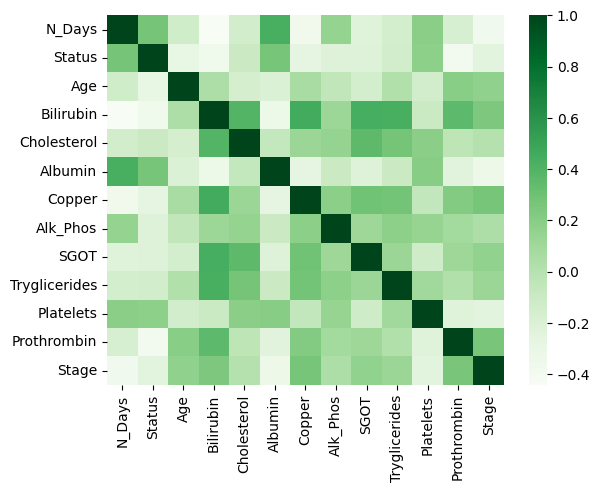

In [33]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)
# Make a heatmap of correlations
sns.heatmap(corr, cmap = 'Greens');

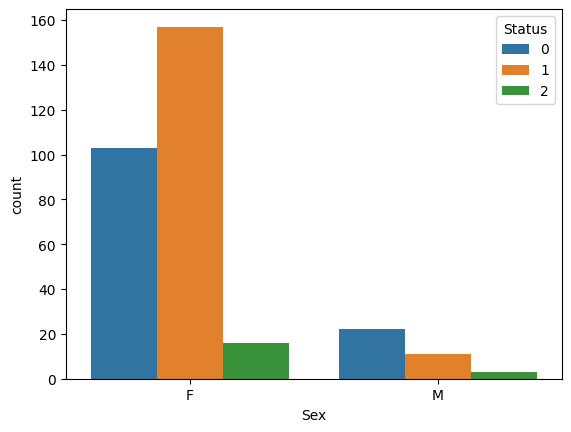

In [34]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='Sex', hue='Status')

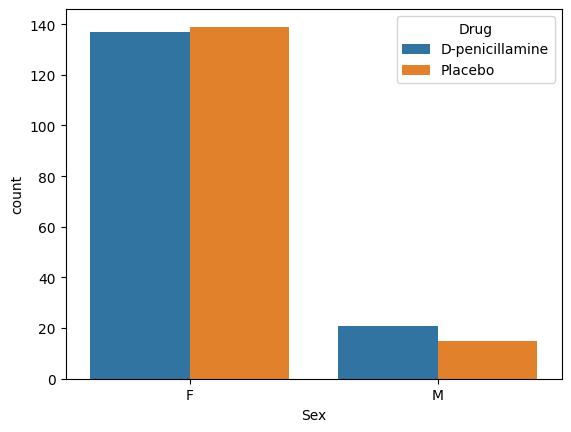

In [35]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='Sex', hue='Drug')

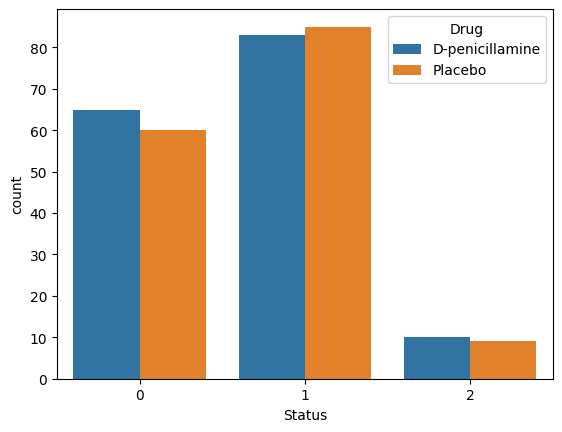

In [36]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='Status', hue='Drug')

##Modeling

In [37]:
target = "Status"
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [38]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

OneHotEncoder Columns: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')
Numeric Columns: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

KNN

In [40]:
# Instantiate default KNN
knn = KNeighborsClassifier()
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        93
           1       0.81      0.92      0.86       131
           2       1.00      0.20      0.33        10

    accuracy                           0.81       234
   macro avg       0.87      0.62      0.65       234
weighted avg       0.82      0.81      0.80       234



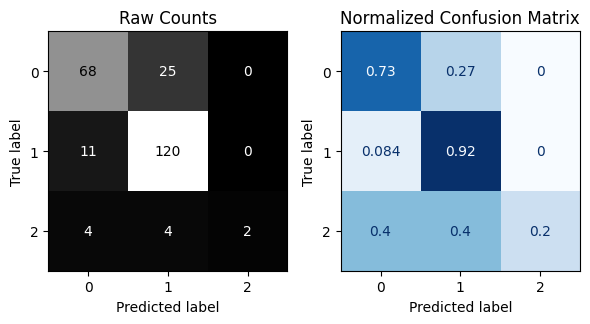


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.66      0.89      0.76        37
           2       0.00      0.00      0.00         9

    accuracy                           0.72        78
   macro avg       0.49      0.54      0.51        78
weighted avg       0.65      0.72      0.67        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


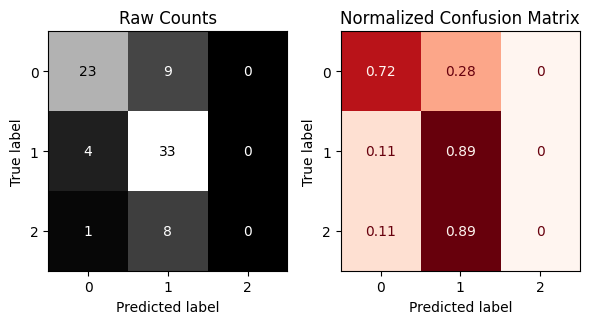

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

In [42]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [43]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
          'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
          'Stage'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',

In [44]:
# Create param grid
params={'kneighborsclassifier__n_neighbors': nneighbors_list}

In [45]:
# Instaniate GridSearchCV
gs = GridSearchCV(knn_pipe, params, verbose=True, n_jobs=-1)
# Fit gs on training data
gs.fit(X_train, y_train)
# Obtain best param value for K
gs.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'kneighborsclassifier__n_neighbors': 21}

In [46]:
# Increasing max_columns to see full cv_results
pd.set_option('display.max_columns',50)
# Getting the cv_results as a dataframe
cv_results = pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037891,0.017763,0.050183,0.017351,1,{'kneighborsclassifier__n_neighbors': 1},0.595745,0.702128,0.702128,0.638298,0.630435,0.653747,0.042019,16
1,0.042461,0.004684,0.033514,0.006357,3,{'kneighborsclassifier__n_neighbors': 3},0.765957,0.787234,0.723404,0.680851,0.673913,0.726272,0.044953,9
2,0.050002,0.003626,0.035974,0.012757,5,{'kneighborsclassifier__n_neighbors': 5},0.723404,0.765957,0.723404,0.680851,0.717391,0.722202,0.027020,10
3,0.036757,0.009903,0.034280,0.012157,7,{'kneighborsclassifier__n_neighbors': 7},0.744681,0.787234,0.744681,0.680851,0.717391,0.734968,0.035094,2
4,0.045625,0.016787,0.030711,0.007549,9,{'kneighborsclassifier__n_neighbors': 9},0.765957,0.744681,0.702128,0.680851,0.717391,0.722202,0.030186,10


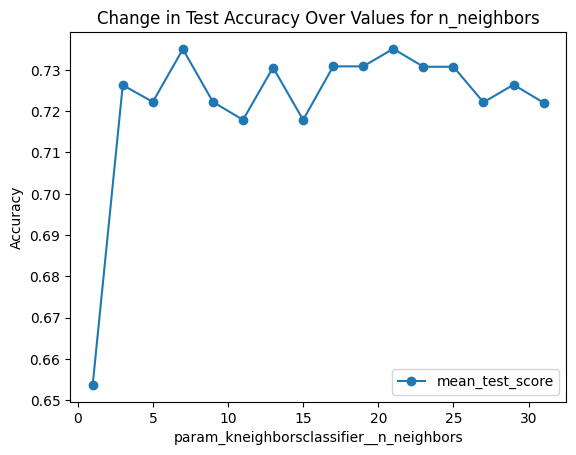

In [47]:
# Plot Accuracy with various values for K
ax = cv_results.plot(x='param_kneighborsclassifier__n_neighbors',
                     y='mean_test_score', style='-o')
ax.set(ylabel="Accuracy", title='Change in Test Accuracy Over Values for n_neighbors');
print()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.54      0.66        93
           1       0.71      0.95      0.81       131
           2       0.00      0.00      0.00        10

    accuracy                           0.74       234
   macro avg       0.52      0.49      0.49       234
weighted avg       0.73      0.74      0.72       234



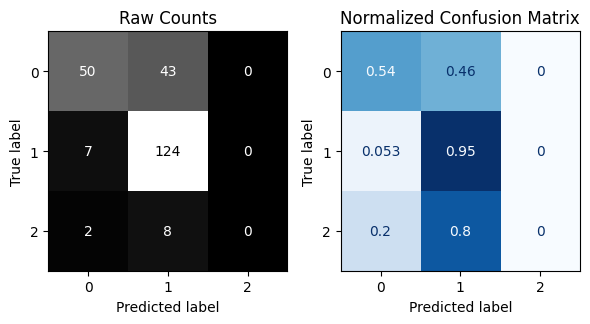

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        32
           1       0.61      0.92      0.73        37
           2       0.00      0.00      0.00         9

    accuracy                           0.67        78
   macro avg       0.48      0.49      0.47        78
weighted avg       0.62      0.67      0.62        78



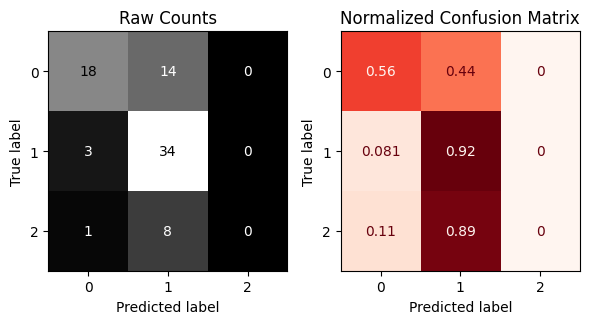

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Obtain complete evaluation for best performing model (k = 16)
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

Random Forest

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [50]:
rf = RandomForestClassifier(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [51]:
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.333
- MSE = 0.436
- RMSE = 0.660
- R^2 = 0.006


In [52]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
          'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
          'Stage'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',

In [53]:
params = {'randomforestclassifier__max_depth': [None,10,15,20],
          'randomforestclassifier__n_estimators':[10,100,150,200],
          'randomforestclassifier__min_samples_leaf':[2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }

In [54]:
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      d...
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15,
                                                               20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [10, 100, 150,
                                                                  200],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=1)

In [55]:
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.111
- MSE = 0.162
- RMSE = 0.403
- R^2 = 0.483

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.346
- MSE = 0.449
- RMSE = 0.670
- R^2 = -0.023
